## Cleaning the Training data

In [1]:
# Reading the file
import pandas as pd
cars = pd.read_excel(r'C:\Users\Ayush Rajpal\Downloads\Data_Train (2).xlsx')
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [2]:
# Analyzing the shape of DataFrame
cars.shape

(6019, 12)

In [3]:
# Dropping null values
cars.dropna(inplace = True, how = 'any')
cars.shape

(5975, 12)

In [4]:
# Unique values in each Series
print(cars.Fuel_Type.unique())
print(cars.Transmission.unique())
print(cars.Owner_Type.unique())

['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [5]:
def fuel(x):
    if x == 'CNG':
        return 1
    elif x == 'Diesel':
        return 2
    elif x == 'Petrol':
        return 3
    else:
        return 4
def trans(x):
    if x == 'Manual':
        return 1
    else:
        return 2
def owner(x):
    if x == 'First':
        return 1
    elif x == 'Second':
        return 2
    elif x == 'Third':
        return 3
    else:
        return 4

In [6]:
# Converting the textual data to numerical data
cars['fuel_num'] = cars.Fuel_Type.apply(fuel)
cars['trans_num'] = cars.Transmission.apply(trans)
cars['owner_num'] = cars.Owner_Type.apply(owner)

del cars['Fuel_Type']
del cars['Transmission']
del cars['Owner_Type']

In [7]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,fuel_num,trans_num,owner_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,1,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,2,1,1
2,Honda Jazz V,Chennai,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,3,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,2,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,2,2,2


In [8]:
def company(x):
    return x.split(' ')[0]

In [9]:
# Taking the brand names
cars['Name2'] = cars.Name.apply(company)

del cars['Name']

In [10]:
cars.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,fuel_num,trans_num,owner_num,Name2
0,Mumbai,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,1,1,1,Maruti
1,Pune,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,2,1,1,Hyundai
2,Chennai,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,3,1,1,Honda
3,Chennai,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,2,1,1,Maruti
4,Coimbatore,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,2,2,2,Audi


In [11]:
loc = list(cars.Location.unique())
brands = list(cars.Name2.unique())

In [12]:
print(loc)

['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad']


In [13]:
def loc_fun(x):
    return loc.index(x)

def brands_fun(x):
    return brands.index(x)

In [14]:
cars['location_num'] = cars.Location.apply(loc_fun)
cars['brands_num'] = cars.Name2.apply(brands_fun)

del cars['Name2']
del cars['Location']

In [15]:
cars.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,fuel_num,trans_num,owner_num,location_num,brands_num
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,1,1,1,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,2,1,1,1,1
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,3,1,1,2,2
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,2,1,1,2,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,2,2,2,3,3


In [16]:
def first(x):
    return x.split(' ')[0]
def last(x):
    return x

In [17]:
# Taking only the numerical part of the data
cars['mileage'] = cars.Mileage.apply(first)
cars['engine'] = cars.Engine.apply(first)
cars['power'] = cars.Power.apply(first)
cars['price'] = cars.Price.apply(last)

In [18]:
del cars['Mileage']
del cars['Engine'] 
del cars['Power']
del cars['Price']

In [19]:
cars.head()

,Year,Kilometers_Driven,Seats,fuel_num,trans_num,owner_num,location_num,brands_num,mileage,engine,power,price
0,2010,72000,5.0,1,1,1,0,0,26.6,998,58.16,1.75
1,2015,41000,5.0,2,1,1,1,1,19.67,1582,126.2,12.50
2,2011,46000,5.0,3,1,1,2,2,18.2,1199,88.7,4.50
3,2012,87000,7.0,2,1,1,2,0,20.77,1248,88.76,6.00
4,2013,40670,5.0,2,2,2,3,3,15.2,1968,140.8,17.74


In [20]:
cars.shape

(5975, 12)

In [21]:
cars.reset_index(drop=True,inplace=True)

In [22]:
indexNames = cars[cars['power'] == 'null' ].index

cars.drop(indexNames, inplace=True)

In [23]:
cars.shape

(5872, 12)

In [24]:
cars.dtypes

Year                   int64
Kilometers_Driven      int64
Seats                float64
fuel_num               int64
trans_num              int64
owner_num              int64
location_num           int64
brands_num             int64
mileage               object
engine                object
power                 object
price                float64
dtype: object

In [25]:
cars['mileage'] = pd.to_numeric(cars['mileage'])
cars['engine'] = pd.to_numeric(cars['engine'])
cars['power'] = pd.to_numeric(cars['power'])
cars.head()

,Year,Kilometers_Driven,Seats,fuel_num,trans_num,owner_num,location_num,brands_num,mileage,engine,power,price
0,2010,72000,5.0,1,1,1,0,0,26.60,998,58.16,1.75
1,2015,41000,5.0,2,1,1,1,1,19.67,1582,126.20,12.50
2,2011,46000,5.0,3,1,1,2,2,18.20,1199,88.70,4.50
3,2012,87000,7.0,2,1,1,2,0,20.77,1248,88.76,6.00
4,2013,40670,5.0,2,2,2,3,3,15.20,1968,140.80,17.74


In [26]:
cars.dtypes

Year                   int64
Kilometers_Driven      int64
Seats                float64
fuel_num               int64
trans_num              int64
owner_num              int64
location_num           int64
brands_num             int64
mileage              float64
engine                 int64
power                float64
price                float64
dtype: object

In [27]:
# rounding the float values first before converting them to int
cars['Seats'] = round(cars.Seats, 0)
cars['mileage'] = round(cars.mileage, 0)
cars['power'] = round(cars.power, 0)
cars['price'] = round(cars.price, 0)

In [28]:
cars.head()

,Year,Kilometers_Driven,Seats,fuel_num,trans_num,owner_num,location_num,brands_num,mileage,engine,power,price
0,2010,72000,5.0,1,1,1,0,0,27.0,998,58.0,2.0
1,2015,41000,5.0,2,1,1,1,1,20.0,1582,126.0,12.0
2,2011,46000,5.0,3,1,1,2,2,18.0,1199,89.0,4.0
3,2012,87000,7.0,2,1,1,2,0,21.0,1248,89.0,6.0
4,2013,40670,5.0,2,2,2,3,3,15.0,1968,141.0,18.0


In [29]:
import numpy as np
data = np.array(cars, int)
print(data)

[[ 2010 72000     5 ...   998    58     2]
 [ 2015 41000     5 ...  1582   126    12]
 [ 2011 46000     5 ...  1199    89     4]
 ...
 [ 2012 55000     8 ...  2498   112     3]
 [ 2013 46000     5 ...   998    67     3]
 [ 2011 47000     5 ...   936    58     2]]


In [30]:
# Splitting the data into input and output
X_train = data[:,:-1]
Y_train = data[:,-1]

## Cleaning the Testing data

In [31]:
cars_test = pd.read_excel(r'C:\Users\Ayush Rajpal\Downloads\Data_Test (2).xlsx')
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [32]:
cars_test.shape

(1234, 11)

In [33]:
cars_test.dropna(inplace = True, how = 'any')
cars_test.shape

(1223, 11)

In [34]:
print(cars_test.Fuel_Type.unique())
print(cars_test.Transmission.unique())
print(cars_test.Owner_Type.unique())

['CNG' 'Petrol' 'Diesel' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Third' 'Fourth & Above']


In [35]:
# Functions defined above, while cleaning the train data
cars_test['fuel_num'] = cars_test.Fuel_Type.apply(fuel)
cars_test['trans_num'] = cars_test.Transmission.apply(trans)
cars_test['owner_num'] = cars_test.Owner_Type.apply(owner)

del cars_test['Fuel_Type']
del cars_test['Transmission']
del cars_test['Owner_Type']

In [36]:
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_num,trans_num,owner_num
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,1,1,1
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,3,1,2
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,2,1,1
3,Toyota Etios Liva GD,Hyderabad,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,2,1,1
4,Hyundai i20 Magna,Mumbai,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,3,1,1


In [37]:
cars_test['Name2'] = cars_test.Name.apply(company)

del cars_test['Name']

In [38]:
cars_test.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_num,trans_num,owner_num,Name2
0,Delhi,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,1,1,1,Maruti
1,Coimbatore,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,3,1,2,Maruti
2,Mumbai,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,2,1,1,Toyota
3,Hyderabad,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,2,1,1,Toyota
4,Mumbai,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,3,1,1,Hyundai


In [39]:
loc = list(cars_test.Location.unique())
brands = list(cars_test.Name2.unique())

In [40]:
print(loc)

['Delhi', 'Coimbatore', 'Mumbai', 'Hyderabad', 'Pune', 'Jaipur', 'Chennai', 'Kochi', 'Bangalore', 'Kolkata', 'Ahmedabad']


In [41]:
cars_test['location_num'] = cars_test.Location.apply(loc_fun)
cars_test['brands_num'] = cars_test.Name2.apply(brands_fun)

del cars_test['Name2']
del cars_test['Location']

In [42]:
cars_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_num,trans_num,owner_num,location_num,brands_num
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,1,1,1,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,3,1,2,1,0
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,2,1,1,2,1
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,2,1,1,3,1
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,3,1,1,2,2


In [43]:
cars_test['mileage'] = cars_test.Mileage.apply(first)
cars_test['engine'] = cars_test.Engine.apply(first)
cars_test['power'] = cars_test.Power.apply(first)

In [44]:
del cars_test['Mileage']
del cars_test['Engine'] 
del cars_test['Power']

In [45]:
cars_test.head()

,Year,Kilometers_Driven,Seats,fuel_num,trans_num,owner_num,location_num,brands_num,mileage,engine,power
0,2014,40929,4.0,1,1,1,0,0,32.26,998,58.2
1,2013,54493,5.0,3,1,2,1,0,24.7,796,47.3
2,2017,34000,7.0,2,1,1,2,1,13.68,2393,147.8
3,2012,139000,5.0,2,1,1,3,1,23.59,1364,null
4,2014,29000,5.0,3,1,1,2,2,18.5,1197,82.85


In [46]:
cars_test.shape

(1223, 11)

In [47]:
cars_test.reset_index(drop=True,inplace=True)

In [48]:
indexNames1 = cars_test[cars_test['power'] == 'null' ].index

cars_test.drop(indexNames1, inplace=True)

In [49]:
cars_test.reset_index(drop=True,inplace=True)

In [50]:
cars_test.shape

(1201, 11)

In [51]:
cars_test['mileage'] = pd.to_numeric(cars_test['mileage'])
cars_test['engine'] = pd.to_numeric(cars_test['engine'])
cars_test['power'] = pd.to_numeric(cars_test['power'])
cars_test.head()

,Year,Kilometers_Driven,Seats,fuel_num,trans_num,owner_num,location_num,brands_num,mileage,engine,power
0,2014,40929,4.0,1,1,1,0,0,32.26,998,58.20
1,2013,54493,5.0,3,1,2,1,0,24.70,796,47.30
2,2017,34000,7.0,2,1,1,2,1,13.68,2393,147.80
3,2014,29000,5.0,3,1,1,2,2,18.50,1197,82.85
4,2016,85609,7.0,2,1,2,1,3,16.00,2179,140.00


In [52]:
cars_test.dtypes

Year                   int64
Kilometers_Driven      int64
Seats                float64
fuel_num               int64
trans_num              int64
owner_num              int64
location_num           int64
brands_num             int64
mileage              float64
engine                 int64
power                float64
dtype: object

In [53]:
# rounding the float values before converting them to int
cars_test['Seats'] = round(cars_test.Seats, 0)
cars_test['mileage'] = round(cars_test.mileage, 0)
cars_test['power'] = round(cars_test.power, 0)
cars_test.head()

,Year,Kilometers_Driven,Seats,fuel_num,trans_num,owner_num,location_num,brands_num,mileage,engine,power
0,2014,40929,4.0,1,1,1,0,0,32.0,998,58.0
1,2013,54493,5.0,3,1,2,1,0,25.0,796,47.0
2,2017,34000,7.0,2,1,1,2,1,14.0,2393,148.0
3,2014,29000,5.0,3,1,1,2,2,18.0,1197,83.0
4,2016,85609,7.0,2,1,2,1,3,16.0,2179,140.0


In [54]:
data2 = np.array(cars_test, int)
print(data2)

[[ 2014 40929     4 ...    32   998    58]
 [ 2013 54493     5 ...    25   796    47]
 [ 2017 34000     7 ...    14  2393   148]
 ...
 [ 2012 28000     5 ...    23  1461    63]
 [ 2013 52262     5 ...    17  1197   104]
 [ 2014 72443     5 ...    10  2148   170]]


In [55]:
X_test = data2[:,:]

## Predicting the Prices of used cars

In [56]:
# Because of the multidimensional data, using Randon forest for better accuracy.
from sklearn.ensemble import RandomForestRegressor

In [57]:
regr_rf = RandomForestRegressor(n_estimators = 100)

In [58]:
regr_rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
Y_train_predict = regr_rf.predict(X_train)

In [60]:
Y_train_predict

array([ 2.04, 11.9 ,  3.72, ...,  4.02,  2.9 ,  2.21])

In [61]:
Y_train_predict = Y_train_predict.reshape(-1,1)

In [62]:
Y_train_predict

array([[ 2.04],
       [11.9 ],
       [ 3.72],
       ...,
       [ 4.02],
       [ 2.9 ],
       [ 2.21]])

In [63]:
# Calculating the Accuracy of the model

regr_rf.score(X_train,Y_train)

0.9846795856605222

In [64]:
# After getting high accuracy, predicting the prices of the test data

Y_test_predict = regr_rf.predict(X_test)

In [65]:
Y_test_predict

array([ 3.33,  2.26, 17.64, ...,  3.54,  4.56, 20.77])

In [66]:
Y_test_predict = Y_test_predict.reshape(-1,1)

In [67]:
Y_test_predict

array([[ 3.33],
       [ 2.26],
       [17.64],
       ...,
       [ 3.54],
       [ 4.56],
       [20.77]])

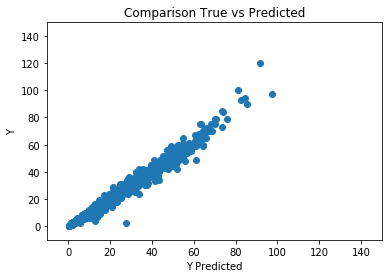

In [75]:
# Comparing the Predicted values to Original values
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Y_train_predict, Y_train)
plt.xlabel('Y Predicted')
plt.ylabel('Y')
plt.title('Comparison True vs Predicted')
plt.axis([-10,150,-10,150])
plt.show()